# Investigate the behavior of ECAL requirement: why the probability drops for large mass?

## Prepare files

In [1]:
import csv
import os
import random
import sys
import numpy as np
import ROOT as r
from matplotlib import pyplot as plt
r.gROOT.ProcessLine(".include /Users/isaac/Work/MG5_aMC_v3_1_0")
r.gInterpreter.Declare(
    '#include "/Users/isaac/Work/MG5_aMC_v3_1_0/ExRootAnalysis/\
ExRootAnalysis/ExRootTreeReader.h"'
)
r.gInterpreter.Declare(
    '#include "/Users/isaac/Work/MG5_aMC_v3_1_0/\
ExRootAnalysis/ExRootAnalysis/ExRootClasses.h"'
)
r.gInterpreter.Declare(
    '#include "/Users/isaac/Work/MG5_aMC_v3_1_0/ExRootAnalysis/\
ExRootAnalysis/ExRootLHEFReader.h"'
)
r.gSystem.Load(
    "/Users/isaac/Work/MG5_aMC_v3_1_0/\
ExRootAnalysis/libExRootAnalysis.so"
)
os.environ["TERM"] = "linux"
random.seed(1)

luminosity = 1.5e04
event_path = "/Users/isaac/Work/MUonE/MG5_events/2to3vec/Events/"
m_e = 5.11e-04
meter = 1
GeV = 1 / (1.97 * meter * 1.0e-16)
Radius = 0.05

lowest_angle_cut = 1.0 / 1000.0  # This requires that the opening angle should be within the resolution
L_min = 0.02
L_max = 14.5 / 100.0  # input cm, change to m
E_cut = 1.0  # energy cuts in unit of GeV

mass_list = [2, 20, 200]
coupling = 1.0e-04
event_path = "/Users/isaac/Work/MUonE/MG5_events/check_iftah/Events/"

Welcome to JupyROOT 6.22/09


In [2]:
def decay_rate(mass, g_e):
    # the \Gamma, eq 10
    alpha_e = (g_e ** 2) / (4 * np.pi)
    return (
        alpha_e
        * mass
        * (1 + 2 * ((m_e ** 2) / (mass ** 2)))
        * np.sqrt(1 - 4 * ((m_e ** 2) / (mass ** 2)))
        * GeV
        / 3
    )


def distance(momentum, mass, g_e):
    # the d_{A^\prime}, eq 11
    return momentum / (decay_rate(mass, g_e) * mass)

def boost(theta, mass, energy):
    beta = np.sqrt(1.0 - (mass/energy)**2)
    gamma = energy/mass
    pcom = np.sqrt(mass**2.0 - 4.0 * (m_e ** 2.0))/2.0
    nominator = gamma * (pcom * np.cos(theta) + beta * mass / 2.0)
    denominator = np.sqrt((pcom**2.0) * (np.sin(theta)**2.0) + (gamma**2.0)*((pcom * np.cos(theta) + beta * mass * 0.5)**2.0))
    return nominator/denominator


In [3]:
chain2 = r.TChain("LHEF")
chain2.Add(os.path.join(event_path,"X_2mev/unweighted_events.root"))
chain20 = r.TChain("LHEF")
chain20.Add(os.path.join(event_path,"X_20mev/unweighted_events.root"))
chain200 = r.TChain("LHEF")
chain200.Add(os.path.join(event_path,"X_200mev/unweighted_events.root"))

1

## Initial quantities of dark photons

In [4]:
X_list_2 = []
for event in chain2:
    for particle in event.Particle:
        if particle.PID == 103:
            E_X = particle.E
            p_X = np.sqrt(particle.E**2 - particle.M**2)
            X_vector = r.TLorentzVector()
            X_vector.SetPtEtaPhiM(particle.PT, particle.Eta, particle.Phi, particle.M)
            theta_X = X_vector.Theta()
            gamma_X = particle.E/particle.M
    X_list_2.append([E_X, p_X, theta_X, gamma_X])
X_list_20 = []
for event in chain20:
    for particle in event.Particle:
        if particle.PID == 103:
            E_X = particle.E
            p_X = np.sqrt(particle.E**2 - particle.M**2)
            X_vector = r.TLorentzVector()
            X_vector.SetPtEtaPhiM(particle.PT, particle.Eta, particle.Phi, particle.M)
            theta_X = X_vector.Theta()
            gamma_X = particle.E/particle.M
    X_list_20.append([E_X, p_X, theta_X, gamma_X])
X_list_200 = []
for event in chain200:
    for particle in event.Particle:
        if particle.PID == 103:
            E_X = particle.E
            p_X = np.sqrt(particle.E**2 - particle.M**2)
            X_vector = r.TLorentzVector()
            X_vector.SetPtEtaPhiM(particle.PT, particle.Eta, particle.Phi, particle.M)
            theta_X = X_vector.Theta()
            gamma_X = particle.E/particle.M
    X_list_200.append([E_X, p_X, theta_X, gamma_X])

In [5]:
with open("./initial_2.csv","w") as f:
    csv.writer(f).writerows(X_list_2)
with open("./initial_20.csv","w") as f:
    csv.writer(f).writerows(X_list_20)
with open("./initial_200.csv","w") as f:
    csv.writer(f).writerows(X_list_200)

## "in-volume dark photon"

In [15]:
involume_2 = []
for i in range(0, len(X_list_2)):
    p_X = X_list_2[i][1]
    d_A = np.random.exponential(distance(p_X, 0.002, 1.0e-04))
    if L_min <= d_A <= L_max:
        involume_2.append(X_list_2[i])
with open("./involume_2.csv", "w") as f:
    csv.writer(f).writerows(involume_2)

involume_20 = []
for i in range(0, len(X_list_20)):
    p_X = X_list_20[i][1]
    d_A = np.random.exponential(distance(p_X, 0.02, 1.0e-04))
    if L_min <= d_A <= L_max:
        involume_20.append(X_list_20[i])
with open("./involume_20.csv", "w") as f:
    csv.writer(f).writerows(involume_20)

involume_200 = []
for i in range(0, len(X_list_200)):
    p_X = X_list_200[i][1]
    d_A = np.random.exponential(distance(p_X, 0.2, 1.0e-04))
    if L_min <= d_A <= L_max:
        involume_200.append(X_list_200[i])
with open("./involume_200.csv", "w") as f:
    csv.writer(f).writerows(involume_200)

## Small angle dark photon

In [ ]:
smallangle_list_2 = []
for j in range(0, 40):
    axis = j+1  
    for i in range(0, len(involume_2)):
        if axis * involume_2[i][2] <= Radius:
            smallangle_list_2.append(involume_2[i])


## Decay products information

In [16]:
decay_list_200 = []
theta_e1_list_200 = []

for i in range(0, len(involume_200)):
    theta_e = np.arccos(np.random.uniform(-1.0,1.0))
    phi_e = np.random.uniform(-np.pi*0.5, np.pi*0.5)
    theta_elab1 = np.arccos(boost(theta_e, 0.2, involume_200[i][0]))
    theta_elab2 = np.arccos(boost(theta_e+np.pi, 0.2, involume_200[i][0]))
    theta_e1_list_200.append(theta_elab1)

theta_e1_list_20 = []

for i in range(0, len(involume_20)):
    theta_e = np.arccos(np.random.uniform(-1.0,1.0))
    phi_e = np.random.uniform(-np.pi*0.5, np.pi*0.5)
    theta_elab1 = np.arccos(boost(theta_e, 0.02, involume_20[i][0]))
    theta_elab2 = np.arccos(boost(theta_e+np.pi, 0.02, involume_20[i][0]))
    theta_e1_list_20.append(theta_elab1)

theta_e1_list_2 = []

for i in range(0, len(involume_2)):
    theta_e = np.arccos(np.random.uniform(-1.0,1.0))
    phi_e = np.random.uniform(-np.pi*0.5, np.pi*0.5)
    theta_elab1 = np.arccos(boost(theta_e, 0.002, involume_2[i][0]))
    theta_elab2 = np.arccos(boost(theta_e+np.pi, 0.002, involume_2[i][0]))
    theta_e1_list_2.append(theta_elab1)

In [15]:
len(theta_e1_list_200)

6

(array([2.649e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([3.28593411e-06, 2.55143835e-01, 5.10284383e-01, 7.65424932e-01,
        1.02056548e+00, 1.27570603e+00, 1.53084658e+00, 1.78598713e+00,
        2.04112768e+00, 2.29626822e+00, 2.55140877e+00]),
 <BarContainer object of 10 artists>)

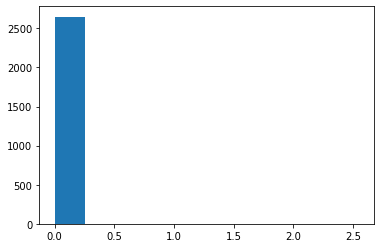

In [12]:
plt.hist(theta_e1_list_20)

In [17]:
with open("./thetalab_20.csv", "w") as f:
    csv.writer(f).writerow(theta_e1_list_20)

In [18]:
with open("./thetalab_200.csv", "w") as f:
    csv.writer(f).writerow(theta_e1_list_200)

with open("./thetalab_2.csv", "w") as f:
    csv.writer(f).writerow(theta_e1_list_2)

## Try another sample with large enough mass points

In [5]:
chain_100k_200 = r.TChain("LHEF")
chain_100k_200.Add(os.path.join(event_path,"X_200mev_100k/unweighted_events.root"))

1

In [6]:
X_list_200_100k = []
for event in chain_100k_200:
    for particle in event.Particle:
        if particle.PID == 103:
            E_X = particle.E
            p_X = np.sqrt(particle.E**2 - particle.M**2)
            X_vector = r.TLorentzVector()
            X_vector.SetPtEtaPhiM(particle.PT, particle.Eta, particle.Phi, particle.M)
            theta_X = X_vector.Theta()
            gamma_X = particle.E/particle.M
    X_list_200_100k.append([E_X, p_X, theta_X, gamma_X])

In [10]:
involume_200_100k = []
for i in range(0, len(X_list_200_100k)):
    p_X = X_list_200_100k[i][1]
    d_A = np.random.exponential(distance(p_X, 0.2, 1.0e-04))
    if L_min <= d_A <= L_max:
        involume_200_100k.append(X_list_200_100k[i])
with open("./involume_200_100k.csv", "w") as f:
    csv.writer(f).writerows(involume_200_100k)

In [22]:
len(involume_200_100k)

49

In [19]:
theta_e1_list_200_100k = []

for i in range(0, len(involume_200_100k)):
    theta_e = np.arccos(np.random.uniform(-1.0,1.0))
    phi_e = np.random.uniform(-np.pi*0.5, np.pi*0.5)
    theta_elab1 = np.arccos(boost(theta_e, 0.2, involume_200_100k[i][0]))
    theta_elab2 = np.arccos(boost(theta_e+np.pi, 0.2, involume_200_100k[i][0]))
    theta_e1_list_200_100k.append(theta_elab1)

with open("./thetalab_200_100k.csv", "w") as f:
    csv.writer(f).writerow(theta_e1_list_200_100k)

In [28]:
good_photon_number = 0
good_decay_number = 0
for j in range(0, 40):
    axis = j+1
    for i in range(0, len(X_list_200_100k)):
        E_X = X_list_200_100k[i][0]
        p_X = X_list_200_100k[i][1]
        theta_X = X_list_200_100k[i][2]
        d_A = np.random.exponential(distance(p_X, 0.2, 1.0e-04))
        if L_min <= d_A <= L_max:
            good_photon_number += 1
            theta_e = np.arccos(np.random.uniform(-1.0, 1.0))
            phi_e = np.random.uniform(-np.pi*0.5, np.pi*0.5)
            theta_elab1 = np.arccos(boost(theta_e, 0.2, E_X))
            theta_elab2 = np.arccos(boost(theta_e+np.pi, 0.2, E_X))
            AB = axis - d_A
            BC = AB * theta_elab1
            BD = axis*theta_X
            BF = AB * theta_elab2
            if BD <= Radius:
                sin_alpha = np.sin(phi_e)
                alpha = np.arcsin(sin_alpha)
                BCmax = Radius * (np.sin(phi_e - alpha)/np.sin(phi_e))
                BFmax = Radius * (np.sin(phi_e + alpha)/np.sin(phi_e))
                if BC <= BCmax and BF<=BFmax:
                    good_decay_number += 1
print(good_decay_number/good_photon_number)


0.0


In [30]:
print(good_decay_number)

0


In [8]:
good_photon_number = 0
good_decay_number = 0
for j in range(0, 40):
    axis = j + 1
    for i in range(0, len(X_list_200_100k)):
        E_X = X_list_200_100k[i][0]
        p_X = X_list_200_100k[i][1]
        theta_X = X_list_200_100k[i][2]
        d_A = np.random.exponential(distance(p_X, 0.2, 1.0e-04))
        if L_min <= d_A <= L_max:
            good_photon_number += 1
            theta_e = np.arccos(np.random.uniform(-1.0, 1.0))
            phi_e = np.random.uniform(-np.pi*0.5, np.pi*0.5)
            theta_elab1 = np.arccos(boost(theta_e, 0.2, E_X))
            theta_elab2 = np.arccos(boost(theta_e+np.pi, 0.2, E_X))
            AB = axis - d_A
            BC = AB * theta_elab1
            BD = axis*theta_X
            BF = AB * theta_elab2
            if BD <= Radius:
                sin_alpha = np.sin(phi_e) * BD/Radius
                alpha = np.arcsin(sin_alpha)
                BCmax = Radius * (np.sin(phi_e - alpha)/np.sin(phi_e))
                BFmax = Radius * (np.sin(phi_e + alpha)/np.sin(phi_e))
                if BC <= BCmax and BF<=BFmax:
                    good_decay_number += 1
print(good_decay_number/good_photon_number)

0.4067439409905163


In [20]:
open_angle_200_100k = []

for i in range(0, len(involume_200_100k)):
    theta_e = np.arccos(np.random.uniform(-1.0,1.0))
    phi_e = np.random.uniform(-np.pi*0.5, np.pi*0.5)
    theta_elab1 = np.arccos(boost(theta_e, 0.2, involume_200_100k[i][0]))
    theta_elab2 = np.arccos(boost(theta_e+np.pi, 0.2, involume_200_100k[i][0]))
    openee=theta_elab1 + theta_elab2
    open_angle_200_100k.append(openee)

with open("./openee_200_100k.csv", "w") as f:
    csv.writer(f).writerow(open_angle_200_100k)

In [21]:
open_angle_20 = []

for i in range(0, len(involume_20)):
    theta_e = np.arccos(np.random.uniform(-1.0,1.0))
    phi_e = np.random.uniform(-np.pi*0.5, np.pi*0.5)
    theta_elab1 = np.arccos(boost(theta_e, 0.02, involume_20[i][0]))
    theta_elab2 = np.arccos(boost(theta_e+np.pi, 0.02, involume_20[i][0]))
    openee=theta_elab1 + theta_elab2
    open_angle_20.append(openee)

with open("./openee_20.csv", "w") as f:
    csv.writer(f).writerow(open_angle_20)

In [4]:
chain_200_g4 = r.TChain("LHEF")
chain_200_g4.Add(os.path.join(event_path + "X_200mev_g-4/unweighted_events.root"))

1

In [5]:
X_list_200_g4 = []
involume_200_g4 = []
theta_e1_list_200_g4 = []
for event in chain_200_g4:
    for particle in event.Particle:
        if particle.PID == 103:
            E_X = particle.E
            p_X = np.sqrt(particle.E**2 - particle.M)
            X_vector = r.TLorentzVector()
            X_vector.SetPtEtaPhiM(particle.PT, particle.Eta, particle.Phi, particle.M)
            theta_X = X_vector.Theta()
            gamma_X = E_X/particle.M
            X_list_200_g4.append([E_X, p_X, theta_X, gamma_X])

for i in range(0, len(X_list_200_g4)):
    p_X = X_list_200_g4[i][1]
    d_A = np.random.exponential(distance(p_X, 0.2, 1.0e-04))
    if L_min <= d_A <= L_max:
        involume_200_g4.append(X_list_200_g4[i])

for i in range(0, len(involume_200_g4)):
    theta_e = np.arccos(np.random.uniform(-1.0,1.0))
    phi_e = np.random.uniform(-np.pi*0.5, np.pi*0.5)
    theta_elab1 = np.arccos(boost(theta_e, 0.2, involume_200_g4[i][0]))
    theta_elab2 = np.arccos(boost(theta_e+np.pi, 0.2, involume_200_g4[i][0]))
    theta_e1_list_200_g4.append(theta_elab1) 

with open("./initial_200_g4.csv", "w") as f:
    csv.writer(f).writerows(X_list_200_g4)

with open("./involume_200_g4.csv", "w") as f:
    csv.writer(f).writerows(involume_200_g4)

with open("./thetalab_200_g4.csv", "w") as f:
    csv.writer(f).writerow(theta_e1_list_200_g4)